# Cupoy官網新聞

## 專案目標

請任選 Cupoy 新聞服務之某一種分類 (如熱門新聞、科技、商業....)，使用你學習過的爬蟲程式，爬取前 500 篇的文章：

https://www.cupoy.com/newsfeed/topstory

In [1]:
#載入套件
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

In [2]:
#指定網址
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  

用Selenium打開一個瀏覽器，連結到網站，然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

In [3]:
#使用webdriver.Chrime()建立Google Chrime瀏覽器物件
browser = webdriver.Chrome()
#以get()方法連結到指定網址
browser.get(Cupoy_url)  # 打開瀏覽器並連到Cupoy網頁

SCROLL_PAUSE_TIME = 1

# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#通過左邊控制橫向和縱向滾動條scrollTo(x, y）
last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while True:
    time.sleep(3) #是Python程序暫停執行3秒
    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print('到達網頁頁面底端')
        break
    print('網頁正在更新中...，請稍後')
    last_height = new_height

網頁正在更新中...，請稍後
網頁正在更新中...，請稍後
到達網頁頁面底端


# 網頁已經更新完畢，所有資料皆已出現在都已出現在網頁。

In [4]:
count = 1
total_count = 500
#建立空的串列(list)
updatetime_list = []
category_list = []
liveness_list = []
title_list = []
content_list = []
href_list = []
while (count <= total_count) :
    html_source = browser.page_source # browser.page_source:網頁原始碼
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        # 文章種類
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        # 文章標題
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        # 文章內容
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        # 文章網址
        href = artical.find("a").get('href')
        # 文章更新時間
        updatetime = artical.find('span').text
        # 防止抓取到重複的文章
        if title not in title_list:
            # 將各種資料存放進串列中(list)
            updatetime_list.append(updatetime)
            category_list.append(category)
            title_list.append(title)
            content_list.append(content)
            href_list.append(href)
            # 計算目前總共已經爬取的文章數量
            count += 1
        # 抓取500篇文章就跳出迴圈
        if count == (total_count + 1):
            break
    
    # 將網頁繼續向下滑
    sleep(3) #暫停執行3秒
    browser.execute_script("window.scrollTo(0, 1000000);") # browser.execute_script():滾動到網頁底部

In [5]:
# 關閉瀏覽器
browser.quit();

In [6]:
# 建立 DataFrame
"""
DataFrame 用來處理結構化(Table like)的資料，
有列索引與欄標籤的二維資料集，
可以透過 Dictionary 或是 Array 來建立。
"""
data = pd.DataFrame([updatetime_list,category_list, title_list, content_list, href_list])
# 確認輸出資料形式
print(data) 
#轉置：df.T
data = data.T

                                                 0    \
0                                              3 小時前   
1                                               手機平板   
2                             Pixel 手機功能更新，讓你用手勢暫停音樂   
3  自 Pixel 4 開始，Google 就把親兒子手機的功能更新獨立分拆，以「Feature...   
4  https://chinese.engadget.com/chinese-2020-03-0...   

                                                 1    \
0                                             10 小時前   
1                                             AI與大數據   
2                              BERT在多模態領域中的應用 | 機器之心   
3  本文主要介紹和對比五個在圖片與文本交互領域應用的 BERT 模型：VisualBert, U...   
4   https://www.jiqizhixin.com/articles/2020-03-03-3   

                                                 2    \
0                                              4 小時前   
1                                             AI與大數據   
2                     史上最全GAN綜述2020版：算法、理論及應用 | 機器之心   
3  本文是一份出自陶大程、葉傑平老師等大牛之手的 GAN 詳細綜述，介紹了近年來有關 GAN 模...   
4  https://www.jiqizhixin.com/articles/2020-03

# 整理資料排列方式

In [7]:
# 加入每一行(column)的名稱 
columnName = ["文章更新時間","文章種類","文章標題","文章內容","文章網址"]
# 改欄位名稱
data.columns = columnName
data

文章更新時間      文章種類                                              文章標題  \
0         3 小時前      手機平板                            Pixel 手機功能更新，讓你用手勢暫停音樂   
1        10 小時前    AI與大數據                             BERT在多模態領域中的應用 | 機器之心   
2         4 小時前    AI與大數據                    史上最全GAN綜述2020版：算法、理論及應用 | 機器之心   
3         5 小時前     區塊鏈技術               美國制裁兩名替北韓駭客集團Lazarus洗錢的中國人 | iThome   
4         5 小時前  Google專區           因新冠疫情嚴重，英偉達GTC、Google Next改爲線上大會 | 機器之心   
..          ...       ...                                               ...   
495  2020/02/05    AI與大數據  刷新SQuAD2.0 | 上海交通大學回顧式閱讀器（Retro-Reader）解析 | 機器之心   
496  2020/02/05    AI與大數據               兩億人共啓家庭辦公：釘釘企業微信崩潰，協同難題如何解決？ | 機器之心   
497  2020/02/05    AI與大數據               百度AI多人體溫檢測方案落地北京清河火車站，助力疫情防控 | 機器之心   
498  2020/02/05    AI與大數據           比男朋友更會聊天的機器人指日可待？谷歌AI發佈新款Chatbot | 機器之心   
499  2020/02/04    AI與大數據                     抗擊新冠肺炎，人工智能技術可以發揮哪些效用？ | 機器之心   

                                                  文章內容  \
0    自 Pixel 4 開始，Google 就把親兒子手機的功能更新獨立分拆，以「Feature...   
1    本文主要介紹和對比五個在圖片與文本交互領域應用的 BERT 模型：VisualBert, U...   
2    本文是一份出自陶大程、葉傑平老師等大牛之手的 GAN 詳細綜述，介紹了近年來有關 GAN 模...   
3        美方指控北韓國家級駭客涉入多起加密貨幣交易中心的金融竊盜案件，並宣佈逮捕兩名涉案的中國人士   
4                    新冠病毒疫情的發展超出了所有人的預料，也由此打亂了各類大會的安排。   
..                                                 ...   
495  本文致力於探索更好的“解碼”設計，重點關注判別器模塊。啓發於人類的閱讀理解模式，提出一種回顧...   
496  受疫情影響，在企業正式恢復復工之前，遠程辦公的狀態至少要持續一週或更長時間，這也使得遠程協作...   
497                      百度正在把擁有的領先AI技術投入到新型冠狀病毒疫情防控中。   
498                     與此前最新的聊天機器人相比，它可以進行更合理、更具體的對話。   
499  除了不捨晝夜的醫護工作者外，人工智能技術也在這場戰役中起到了不可小覷的作用，快速體溫檢測、大...   

                                                  文章網址  
0    https://chinese.engadget.com/chinese-2020-03-0...  
1     https://www.jiqizhixin.com/articles/2020-03-03-3  
2    https://www.jiqizhixin.com/articles/2020-03-03-12  
3                https://www.ithome.com.tw/news/136119  
4    https://www.jiqizhixin.com/articles/2020-03-03-11  
..                                                 ...  
495   https://www.jiqizhixin.com/articles/2020-02-05-7  
496   https://www.jiqizhixin.com/articles/2020-02-05-6  
497   https://www.jiqizhixin.com/articles/2020-02-05-4  
498   https://www.jiqizhixin.com/articles/2020-02-05-3  
499  https://www.jiqizhixin.com/articles/2020-02-04-10  

[500 rows x 5 columns]

In [8]:
# 回傳列數與欄數 
print("資料行數: ",data.shape[0]) 
print("資料列數: ",data.shape[1]) 
print("----------------------------------------------------------------------------------------------------") 
# 回傳欄位名稱
print(data.columns)

資料行數:  500
資料列數:  5
----------------------------------------------------------------------------------------------------
Index(['文章更新時間', '文章種類', '文章標題', '文章內容', '文章網址'], dtype='object')


# 儲存CSV

將爬取到的500筆新聞資料儲存一個.CSV檔案。

In [9]:
# 儲存成 .xlsx
data.to_csv("Cupoy_news.csv", encoding="utf-8")

# 類別分類

In [10]:
import pandas as pd
category_count = {}

for category in category_list:
    #如果該類別不存在，則計算第一次
    if category not in category_count:
        category_count[category] = 1
    #類別存在，則計算數量    
    else:
        category_count[category] += 1

# 依照分類數量大小進行排序       
top_category = dict(sorted(category_count.items(),reverse = True,key=lambda item:item[1]))
print("top_category: ",top_category)
print()
print("category_count: ",category_count)
# 類別名稱
labels = list(top_category.keys())
# 類別數量
values = list(top_category.values())
category_count_data = pd.DataFrame(values,index=labels,columns = ["數量"])
print()
print(category_count_data.sort_values(by = "數量",ascending=False))                                   
print("==========================================================================================================")
#輸出計算結果
print("總共類別數: ", category_count_data.shape[0])
print("==========================================================================================================")
# 回傳欄位名稱
print(category_count_data.columns)      

top_category:  {'AI與大數據': 246, '區塊鏈技術': 32, '蘋果專區': 27, 'APP應用程式': 24, '手機平板': 21, '3C產品': 21, '資訊安全': 16, '職涯': 15, '社交媒體': 15, '無人駕駛': 11, '遊戲情報': 10, 'Google專區': 9, '電子商務': 9, '醫療健康': 6, '創業': 5, '理財': 5, '趨勢與策略': 5, '物聯網': 4, '財經': 4, '相機': 3, '筆電': 3, 'Fintech金融科技': 2, '美食': 2, '行銷': 2, '新海誠【你的名字】超越宮崎駿的男人': 1, '旅遊': 1, '籃球': 1}

category_count:  {'手機平板': 21, 'AI與大數據': 246, '區塊鏈技術': 32, 'Google專區': 9, '蘋果專區': 27, '創業': 5, '遊戲情報': 10, '職涯': 15, '無人駕駛': 11, '3C產品': 21, '社交媒體': 15, 'APP應用程式': 24, '電子商務': 9, '相機': 3, '資訊安全': 16, '筆電': 3, '新海誠【你的名字】超越宮崎駿的男人': 1, '物聯網': 4, 'Fintech金融科技': 2, '醫療健康': 6, '旅遊': 1, '美食': 2, '理財': 5, '財經': 4, '籃球': 1, '行銷': 2, '趨勢與策略': 5}

                    數量
AI與大數據             246
區塊鏈技術               32
蘋果專區                27
APP應用程式             24
手機平板                21
3C產品                21
資訊安全                16
職涯                  15
社交媒體                15
無人駕駛                11
遊戲情報                10
Google專區             9
電子商務                 9
醫療健康

In [11]:
d_sorted = data.sort_values(by = "文章種類",ascending=False)

# 數據資料視覺化

## 圓餅圖 

ValueError: too many values to unpack (expected 2)

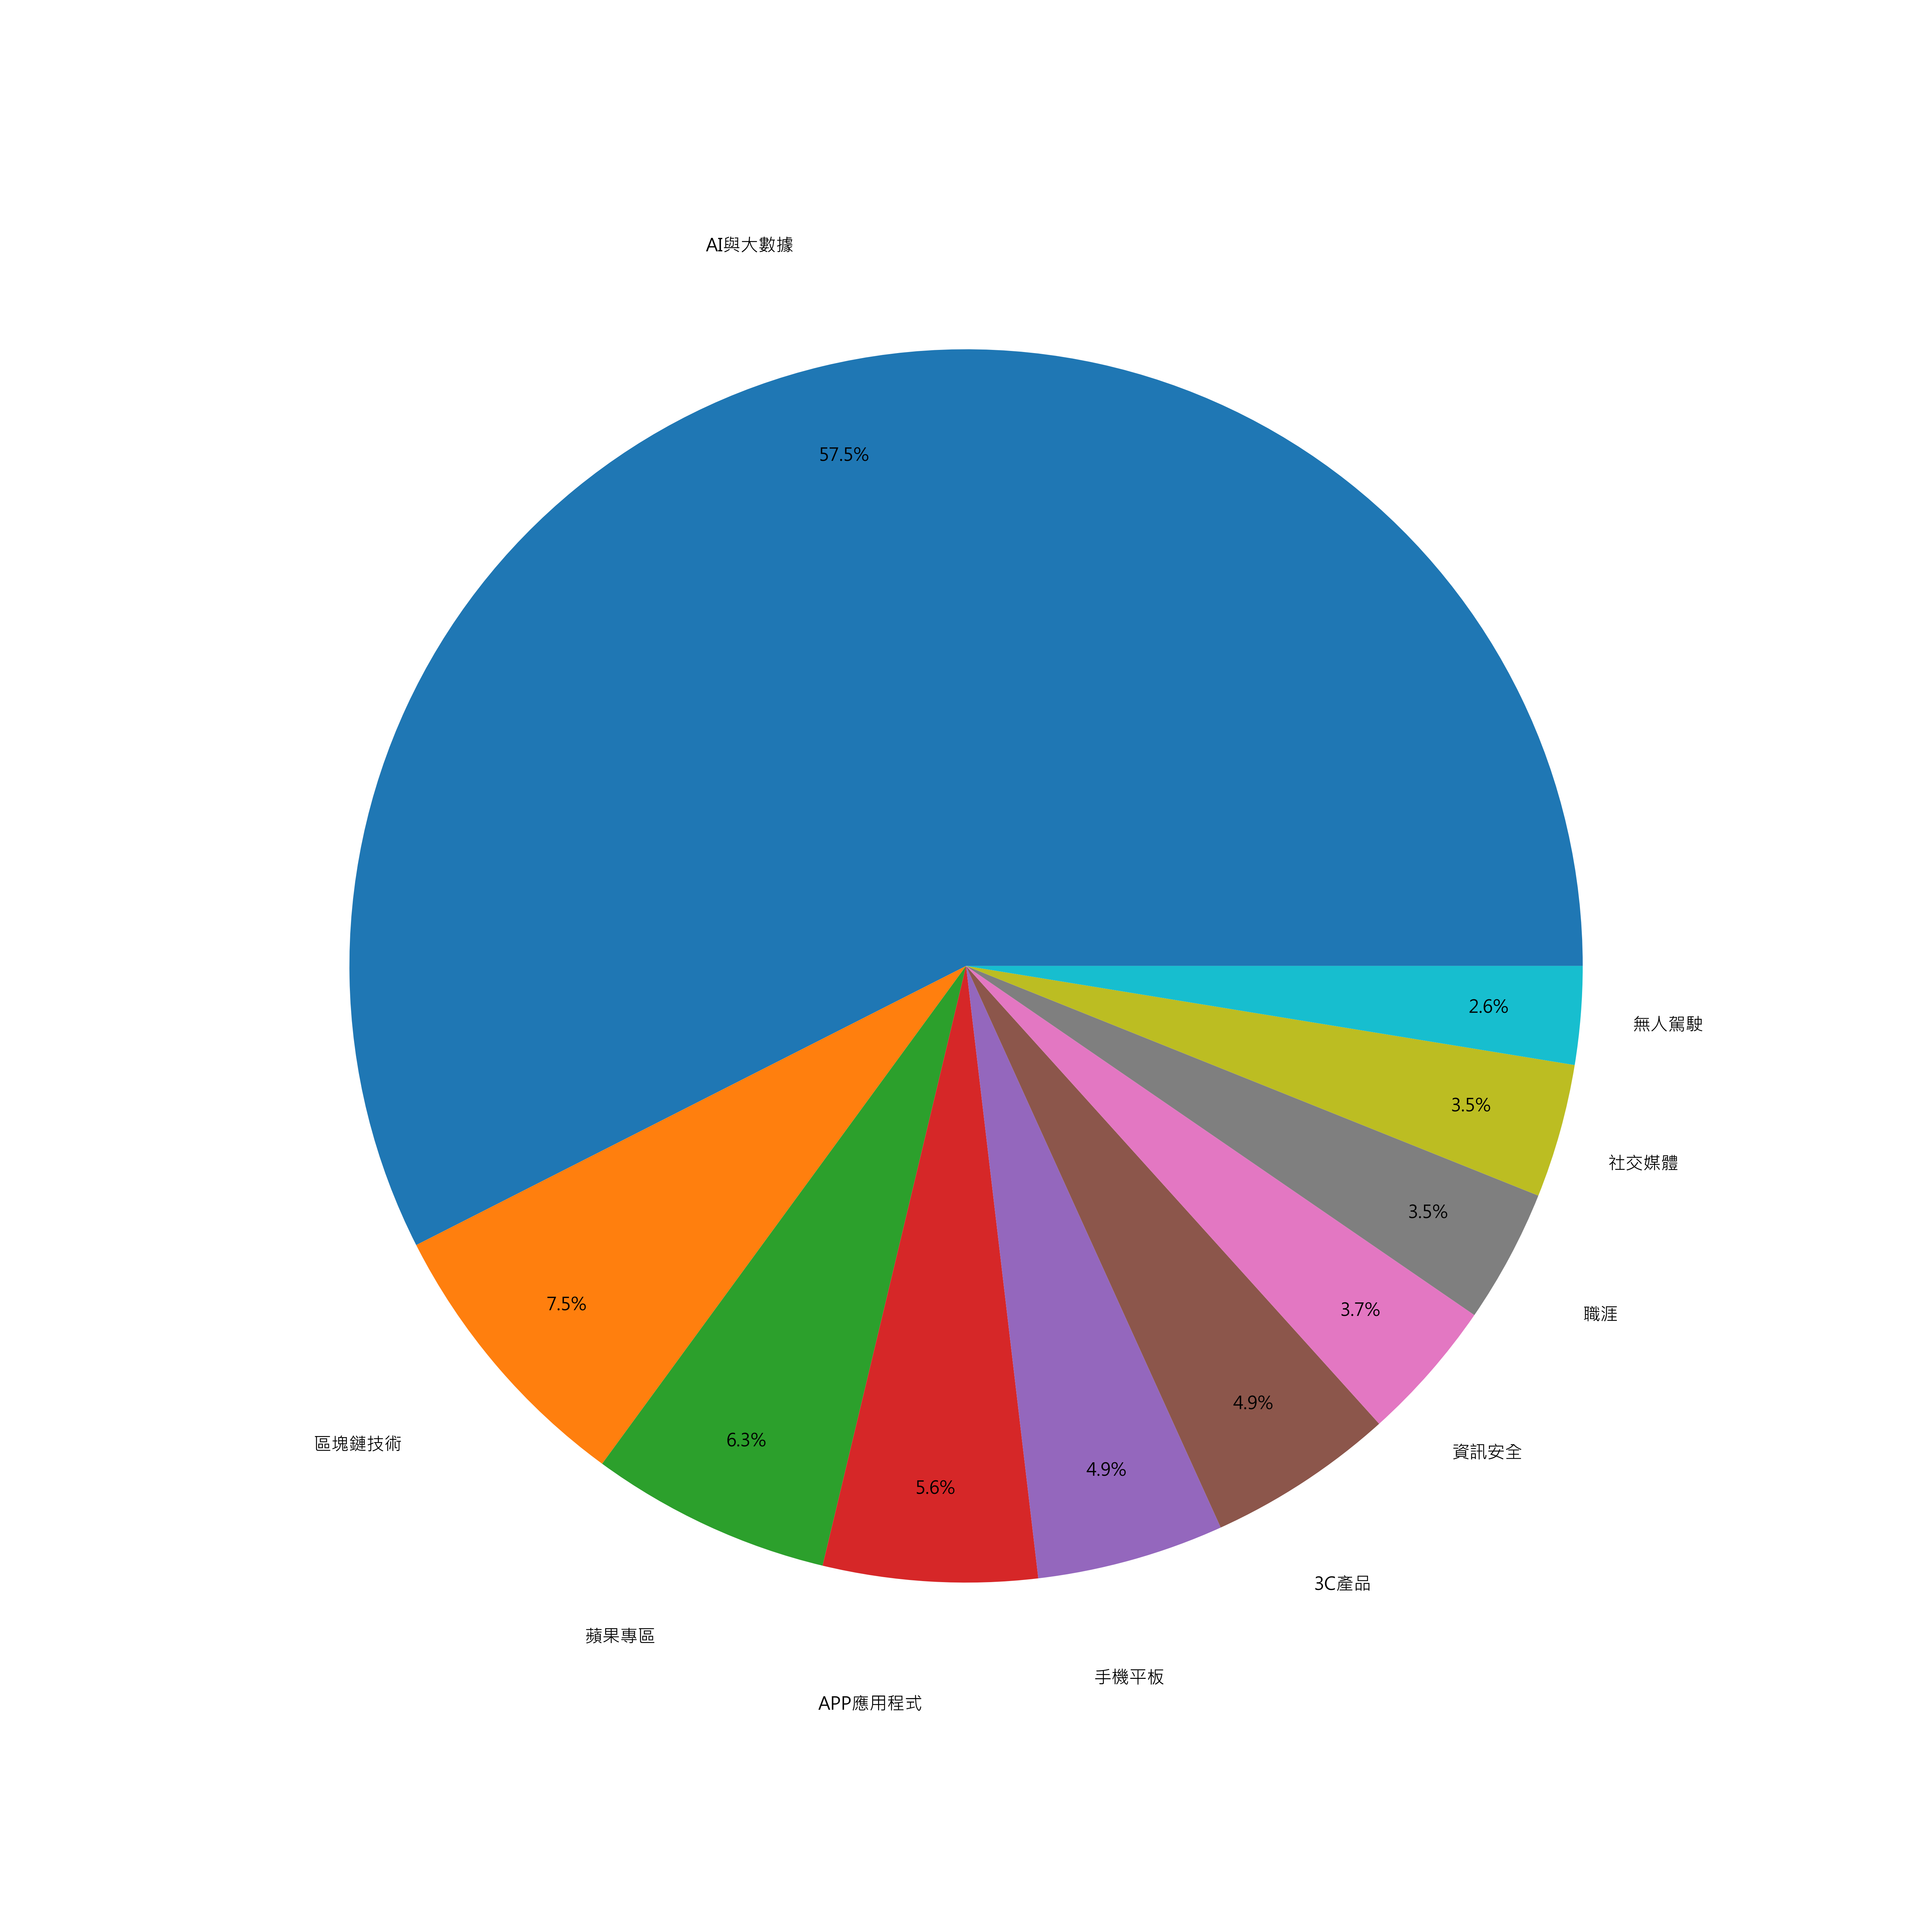

In [12]:
# 載入套件
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties# import字型管理套件

myfont = FontProperties(fname = r"./NotoSansCJK-Black.ttc")

#使用rcParams 參數指定字體
# 中文亂碼的處理，rcParams也可以用於設定圖的解析度，大小等資訊
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 設定圓餅圖大小
plt.figure(figsize=(200,100))
l_text,p_text = plt.pie(values[0:10],
                        labels = labels[0:10], # 分類的標記
                        autopct="%1.1f%%", #数值保留固定小數位
                        shadow=False, # 是否使用陰影
                        labeldistance = 1.2,
                        pctdistance = 0.85, # 數值與圓餅圖的圓心距離
                        radius = 0.8,       # 圓餅圖的半徑，預設是1
                        center = (-50,0),     # 圓餅圖的圓心座標
                        textprops = {"fontsize" : 50}) # 文字大小


#設定劃出正元餅圖
plt.axis("equal")
#設定橫縱座標的名稱以及對應字型格式
font2 = {'size': 50}
# 設定legnd的位置
plt.legend(loc = "best",prop=font2)
plt.savefig("Pie chart of Cupoy_news") # 儲存圖檔
plt.show()


## 直方圖

In [13]:
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 110
plt.figure(figsize=(200,180))
plt.legend()
plt.xlabel('文章類別')
plt.ylabel('文章數量')
plt.title('爬蟲文章數量')
plt.bar(labels[0:10],
        values[0:10],
        edgecolor='#EFB28C',
        color='#EED19C',
        linewidth=3)

# 標示文字資訊
for x, y in zip(labels[0:10], values[0:10]):
     plt.text(x, y*2/3, str(y), # y座標調整在2/3的位置
              fontsize=150,      # 調整大小
              color='black',    # 調整顏色
              ha='center')      # 水平置中，效果為以中心點對準給定之座標
plt.savefig("Bar chart of Cupoy_news", # 儲存圖檔
             bbox_inches='tight',      # 去除座標軸占用的空間
             pad_inches=0.0)        # 去除所有白邊
plt.show()

No handles with labels found to put in legend.


# jieba.cut分詞

### 參考來源 

https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/32296/

https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01

https://www.twblogs.net/a/5b998fec2b717757338fd4b6

###  繁體字較完整詞庫

https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt

### 停用詞詞庫

https://raw.githubusercontent.com/tomlinNTUB/Python/master/%E4%B8%AD%E6%96%87%E5%88%86%E8%A9%9E/%E5%81%9C%E7%94%A8%E8%A9%9E.txt

In [53]:
# 載入套件
import jieba

# 設定預設詞庫
jieba.set_dictionary('D:\\Jupyter\\1st-PyCrawlerMarathon\\dict.txt.big.txt')

# 準備標題語料
titles = ''
for title in title_list:
    titles += title 

# 準備內容語料 
contents = ''
for content in content_list:
    contents += content  

# 停用詞設定    
with open('D:\\Jupyter\\1st-PyCrawlerMarathon\\stopword.txt', 'r', encoding='UTF-8') as f:
    stop_words = f.read().split('\n')
    stop_words.append('，')


# 對titles進行斷詞
term_titles = []
# 斷詞模式 - 精確模式
jct_list = jieba.cut(titles,cut_all=False)
print('generator: ',jct_list )
for word in jct_list:
    print(word,end=' ')
    print() # 換行
    # 移除停留詞
    if word not in stop_words:
        term_titles.append(word)
print(term_titles)

# 對contents進行斷詞
term_contents = []
# 斷詞模式 - 精確模式
jcc_list = jieba.cut(contents,cut_all=False)
print('generator: ',jcc_list )
for word in jcc_list:
    if word not in stop_words:
        term_contents.append(word)
print(term_contents)

        

Building prefix dict from D:\Jupyter\1st-PyCrawlerMarathon\dict.txt.big.txt ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.u6d37b53a987a9743c64682e49ab76613.cache


generator:  <generator object Tokenizer.cut at 0x0000026644B7A9C8>


Loading model cost 1.187 seconds.
Prefix dict has been built successfully.


Pixel 
  
手機 
功能 
更新 
， 
讓 
你 
用 
手勢 
暫停 
音樂 
BERT 
在 
多 
模態 
領域 
中 
的 
應用 
  
| 
  
機器 
之心史 
上 
最全 
GAN 
綜述 
2020 
版 
： 
算法 
、 
理論 
及 
應用 
  
| 
  
機器 
之心 
美國 
制裁 
兩名 
替 
北韓 
駭客 
集團 
Lazarus 
洗錢 
的 
中國 
人 
  
| 
  
iThome 
因新冠 
疫情 
嚴重 
， 
英 
偉達 
GTC 
、 
Google 
  
Next 
改爲 
線上 
大會 
  
| 
  
機器 
之心 
你 
有 
特斯拉 
， 
我 
有 
樹莓 
派 
， 
純手工 
打造 
車載 
車牌 
識別 
檢測 
系統 
， 
家用車 
秒 
變 
智能 
車 
  
| 
  
機器 
之心 
iOS 
  
更新 
偷 
讓 
舊 
  
iPhone 
  
變慢 
！ 
蘋果 
將付 
  
5 
  
億美元 
和解 
  
- 
  
INSIDE 
「 
坦白說 
， 
我 
開始 
走 
創投 
是 
失敗 
的 
！ 
」 
矽谷 
創業 
之神 
陳 
五福 
的 
創投 
心法 
練成 
術 
  
| 
  
TechNews 
  
科技 
新報 
BMC 
收購 
老牌 
大型 
主機 
軟體 
商 
Compuware 
  
| 
  
iThomeAI 
「 
煉丹 
師 
」 
被 
正式 
列入 
新 
職業 
！ 
光 
阿里 
系 
從業者 
就 
超 
20 
萬 
， 
AI 
人才 
迎來 
需求 
之變 
  
| 
  
機器 
之心 
賈揚 
清 
： 
如何 
看待 
人工智能 
方向 
的 
重要 
問題 
？ 
  
| 
  
機器 
之心 
智能 
製造 
大 
事件 
彙總 
： 
騰訊 
機器人 
專利 
成功 
授權 
、 
華爲 
在 
歐 
首個 
5G 
製造 
工廠 
、 
10 
筆 
投融資 
  
| 
  
機器 
之心 
一年 
內 
三家 
獨立 
影像 
中心 
獲上 
億 
融資 
， 
疫情 
之後 
該 
如何 
發揮 
價值 
  
| 
  
機器 
之心 
哈工大 
訊 
飛

評論 
網郭 
明 
錤 
： 
供應鏈 
慘 
， 
蘋果 
新機 
恐 
延後 
1 
- 
3 
個 
月 
發佈 
- 
風傳 
媒 
智慧 
燈泡 
被 
黑客 
盯上 
了 
， 
小心 
信息 
洩露 
！ 
iPhone 
  
11 
、 
Pixel 
  
4 
、 
Galaxy 
  
Note 
  
10 
+ 
、 
ZenFone 
  
6 
、 
OPPO 
  
Reno 
  
旗艦 
手機 
誰 
是夜 
拍王 
？ 
逆光 
、 
空景 
、 
自拍 
完全 
實戰 
  
| 
  
T 
客邦 
iPhone 
卡機 
了 
？ 
iOS 
  
13.4 
新 
功能 
開放 
用 
Wi 
- 
Fi 
連線 
回 
復 
系統 
  
- 
  
Yahoo 
奇摩 
新聞 
拓 
版圖 
  
LINE 
數位 
貨幣 
交易所 
上線 
  
- 
  
Yahoo 
奇摩 
新聞 
手機 
比 
馬桶 
髒 
3.5 
倍 
！ 
它 
不可 
擦 
手機 
  
- 
  
Yahoo 
奇摩 
新聞 
499 
合約 
到期 
面臨 
換約 
潮 
？ 
電信 
商 
紛紛 
祭 
優惠 
留客 
  
這家 
更 
搶 
推 
5G 
早鳥 
資費 
合約 
  
- 
  
Yahoo 
奇摩 
新聞 
曾經 
融資 
72 
億 
的 
電商 
明星 
， 
2 
年 
就 
夭折 
。 
他 
的 
故事 
告訴 
我們 
， 
太快 
被 
賦予 
厚望 
， 
反而 
是 
揠苗助長 
  
| 
  
創新 
拿 
鐵 
任天堂 
主題樂園 
今夏 
登場 
！ 
亮點 
搶先 
曝光 
： 
一起 
收集 
金幣 
、 
與 
瑪利 
歐 
賽車 
吧 
  
| 
  
經理人 
八分 
生活 
  
80% 
LIFE 
智能 
燈泡 
也 
被 
黑客 
盯上 
了 
， 
小心 
信息 
泄露 
  
| 
  
機器 
之心 
CVPR 
  
2020 
  
| 
  
給 
Deepfake 
  
假臉 
做 
  
X 
- 
Ray 
， 
新 
模型 
把換 
臉圖 
打回 
原形 
  
| 
  
機器 
之心 
那個 
提出 
「 
戴森球 
」 
的 


Video 
  
Editor 
  
v9.2 
. 
1 
  
影音 
剪輯 
、 
影片 
編輯 
軟體 
  
– 
  
重灌 
狂人 
武漢 
肺炎 
這把 
火燒 
到 
了 
  
iPhone 
  
相機 
模組 
供應商 
  
- 
  
Saydigi 
- 
Tech 
  
| 
  
點子 
科技 
【 
小宅 
開箱 
】 
iPhone 
  
11 
開箱 
不 
嫌 
晚 
， 
隱藏 
祕技 
告訴 
你 
。 
  
- 
  
Mobile01 
解讀 
火幣 
「 
燒了 
218 
億 
」 
的 
野心 
佈局 
｜ 
銷毀 
  
1.5 
  
億枚 
  
HT 
、 
公鏈 
測試 
網上 
線 
、 
準備 
進攻 
  
Defi 
  
| 
  
動區動 
趨 
- 
最具 
影響力 
的 
區塊 
鏈 
媒體 
  
( 
比特 
幣 
, 
  
虛擬 
貨幣 
) 
林坤 
正 
： 
特斯拉 
股價 
大漲 
之後 
， 
自駕車 
將 
改變 
人類 
生活 
  
| 
  
財訊 
- 
  
掌握 
趨勢 
  
  
投資 
未來 
  
| 
  
最 
懂 
投資 
的 
財經 
媒體 
Galaxy 
  
Tab 
  
S6 
  
Lite 
  
網上 
現身 
  
中階 
平板 
配 
  
S 
- 
Pen 
  
手寫 
功能 
  
| 
  
香港 
  
unwire 
. 
hk 
  
玩 
生活 
． 
樂 
科技 
換掉 
20 
美元 
掀蓋 
手機 
， 
蘋果 
最大 
股東 
巴菲特 
終於 
也 
用 
iPhone 
- 
財經 
新報 
- 
美股 
- 
商周 
財富網 
路透社 
： 
iPhone 
  
的 
南韓 
鏡頭 
模組 
供應商 
停工 
  
- 
  
New 
  
MobileLife 
  
流動 
日報 
SEO 
  
自動化 
無理 
! 
? 
購物 
/ 
媒體 
資訊 
型 
網站 
內容 
主題性 
分類 
必要 
與 
最大 
價值 
  
– 
  
看見 
數據 
． 
通往 
  
5G 
  
之 
路 
： 
有 
「 
  
AI 
  
」 
的 
  
5G 
  

Python 
中 
的 
貝葉斯 
機器 
學習 
： 
A 
  
/ 
  
B 
測試 
  
- 
  
Soft 
  
& 
  
Share 
  
線上 
課程 
資訊 
分享 
． 
全面 
解析 
工業 
  
4.0 
  
和 
雲 
計算 
、 
大 
數據 
  
- 
  
3S 
  
Market 
「 
全球 
智慧 
科技 
應用 
」 
市場 
資訊網 
Logo 
  
Instant 
  
提供 
上 
千個 
免費 
  
Logo 
  
素材 
  
AI 
  
檔 
， 
個人 
、 
商用 
皆 
可 
Get 
  
the 
  
Scoop 
  
on 
  
Mit 
  
Data 
  
Science 
  
Before 
  
You 
’ 
re 
  
Too 
  
Late 
  
| 
  
MyDesy 
  
淘 
靈感 
YouTube 
  
歌曲 
怎麼 
去除 
人聲 
？ 
Moises 
. 
ai 
  
用 
  
AI 
  
幫 
你 
自動 
去除 
， 
練歌 
免去 
  
KTV 
  
靠 
它 
就 
  
OK 
  
: 
: 
  
哇哇 
3C 
日誌 
． 
深度 
學習 
  
+ 
  
符號 
表徵 
  
= 
  
強大 
的 
多任務 
通用 
表徵 
， 
Deep 
  
Mind 
  
新 
論文 
可能 
開啓 
  
AI 
  
新 
時代 
  
- 
  
3S 
  
Market 
「 
全球 
智慧 
科技 
應用 
」 
市場 
資訊網 
CES 
  
2020 
： 
Moen 
新款 
智慧 
水龍頭 
「 
U 
」 
支援 
聲控 
方式 
精準 
調整 
出水量 
與 
水溫 
  
( 
151131 
) 
  
- 
  
癮 
科技 
  
Cool3cCES 
  
2020 
： 
Bosch 
推出 
小型 
AI 
偵測 
太空 
設備 
異常 
裝置 
SoundSee 
  
聽 
聲音 
就 
知道 
哪裡 
出 
問題 
  
( 
151124 
) 
  
- 
  
癮 
科技 
  
Cool3c 
黃 
哲斌 
： 
人工智慧 
的 
「 
天網 


當前 
， 
消毒 
、 
配送 
、 
巡檢 
、 
送餐 
… 
… 
機器人 
在 
行動 
  
| 
  
機器 
之心 
MIT 
最新 
研究 
顯示 
： 
美國 
中期 
選舉 
的 
投票 
軟件 
可 
篡 
結果 
  
| 
  
機器 
之心 
ArXiv 
  
Weekly 
  
Radiostation 
： 
本週 
NLP 
、 
CV 
、 
ML 
精選 
論文 
30 
篇 
（ 
2.9 
- 
2.15 
） 
  
| 
  
機器 
之心 
Hinton 
組 
力作 
： 
ImageNet 
無 
監督 
學習 
最佳 
性能 
一次 
提升 
7% 
， 
媲美 
監督 
學習 
  
| 
  
機器 
之心 
一天 
1300 
  
Star 
量 
， 
GitHub 
上 
新 
官方 
命令行 
工具 
  
| 
  
機器 
之心 
不用 
計算器 
怎麼 
開平方 
？ 
徒手 
也 
可以 
  
| 
  
機器 
之心 
Social 
  
Science 
  
One 
及 
臉書 
終於 
釋出 
內含 
3 
, 
800 
萬個 
網址 
的 
資料集 
  
| 
  
iThome 
技術 
、 
應用 
、 
開放平臺 
， 
三大 
維度 
概括 
2019 
年 
中國 
AI 
產業 
發展 
  
| 
  
機器 
之心 
鍾南山 
、 
李蘭娟 
團隊 
從 
糞便 
中 
分離 
出新 
冠活 
病毒 
， 
到底 
還有 
多少 
潛在 
傳播 
途徑 
？ 
  
| 
  
機器 
之心 
3999 
起售 
： 
小米 
手機 
10 
正式 
發佈 
， 
一億 
像素 
太空 
拍 
地球 
  
| 
  
機器 
之心 
不想 
橫屏 
看 
視頻 
？ 
谷歌 
開源 
框架 
AutoFlip 
一鍵 
截出 
最 
精彩 
豎版 
視頻 
  
| 
  
機器 
之心 
巡檢 
「 
局部 
抄襲 
」 
， 
阿里 
服飾 
版權 
算法 
入選 
AAAI 
  
2020 
  
| 
  
機器 
之心 
英特爾 
MKL 
加速 
AMD 
計算 
可達 
3 
倍 
？ 
AMD 
  
Yes 
  
| 
  


[' ', 'Pixel', ' ', ' ', 'Google', ' ', '親兒子', '手機', '功能', '更新', '獨立', '分拆', '「', 'Feature', ' ', 'Drop', '」', '名義', '推送', '目的', '安全性', '更新', '功能', '更新', '不會', '混在', '一起', '最新', '一次', ' ', 'feature', ' ', 'drop', ' ', ' ', 'Pixel', ' ', ' ', '手勢', '控制', '加入', '「', '按下', '」', '暫停', '手勢', '適用於', '音樂', '播放', ' ', ' ', ' ', 'Pixel', ' ', '手機', '會', '新', '功能', '包括', '日落', '時間', '自動', '開啟', '暗黑', '模式', ' ', 'Wi', '-', 'Fi', ' ', '實際', '位置', '觸發', '自動化', '功能', '（', '出門時', '自動', '開啟', '鈴聲', '）', '使用', ' ', 'Google', ' ', 'Pay', '本文', '主要', '介紹', '五個', '圖片', '文本', '交互', '領域', '應用', ' ', 'BERT', ' ', '模型', 'VisualBert', ',', ' ', 'Unicoder', '-', 'VL', ',', ' ', 'VL', '-', 'Bert', ',', ' ', 'ViLBERT', ',', ' ', 'LXMERT', '本文', '一份', '出自', '陶大程', '葉傑平', '老師', '大牛', '之手', ' ', 'GAN', ' ', '詳細', '綜述', '介紹', '近年來', ' ', 'GAN', ' ', '模型', '相關', '研究進展', '指出', '今後', '領域', '發展', '方向', '美方', '指控', '北韓', '國家級', '駭客', '涉入', '多起', '加密', '貨幣', '交易中心', '金融', '竊盜', '案件', '宣佈', '逮捕', '兩名', '涉案', '中國', '人士', '新冠

# 統計詞頻

In [54]:
# 載入套件
import pandas as pd

def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq

# title 詞頻
title_freq = count_segment_freq(term_titles)
print(title_freq)
print() #換行
# content 詞頻
content_freq = count_segment_freq(term_contents)
print(content_freq)

     count
seg       
      2108
|      296
-      242
機器     164
之心     146
..     ...
最後       1
最小       1
最富       1
最好       1
恐怕       1

[3324 rows x 1 columns]

     count
seg       
      2363
/      178
「      174
-      167
」      166
..     ...
最有       1
最火       1
最為       1
最糟       1
所發       1

[6829 rows x 1 columns]


In [55]:
term_titles = ' '.join(term_titles)
term_contents = ' '.join(term_contents)

# Wordcloud - 標題

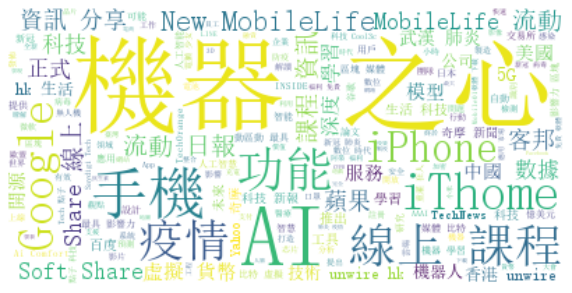

In [56]:
# 載入模組/套件
from wordcloud import WordCloud

# 建立worldcloud物件
wc = WordCloud(background_color = 'white', #設定背景顏色，預設背景顏色為黑色
               font_path = "C:\\Windows\\Fonts\\simsun.ttc", #設定文字字型
               max_words=200, # 最大分詞數量
               prefer_horizontal=0.9 #調整分詞中水平與垂直的比例
               #mask = #設定文字雲形狀，文字雲預設形狀是長方形
                     )

# 以字典資料建立文字雲
wc.generate(term_titles)

# 繪圖及存檔
plt.figure(figsize=(50,50))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# 輸出圖片
fig_path = "D:\\Jupyter\\1st-PyCrawlerMarathon\\title.png"
wc.to_file(fig_path)

# Wordcloud - 內容

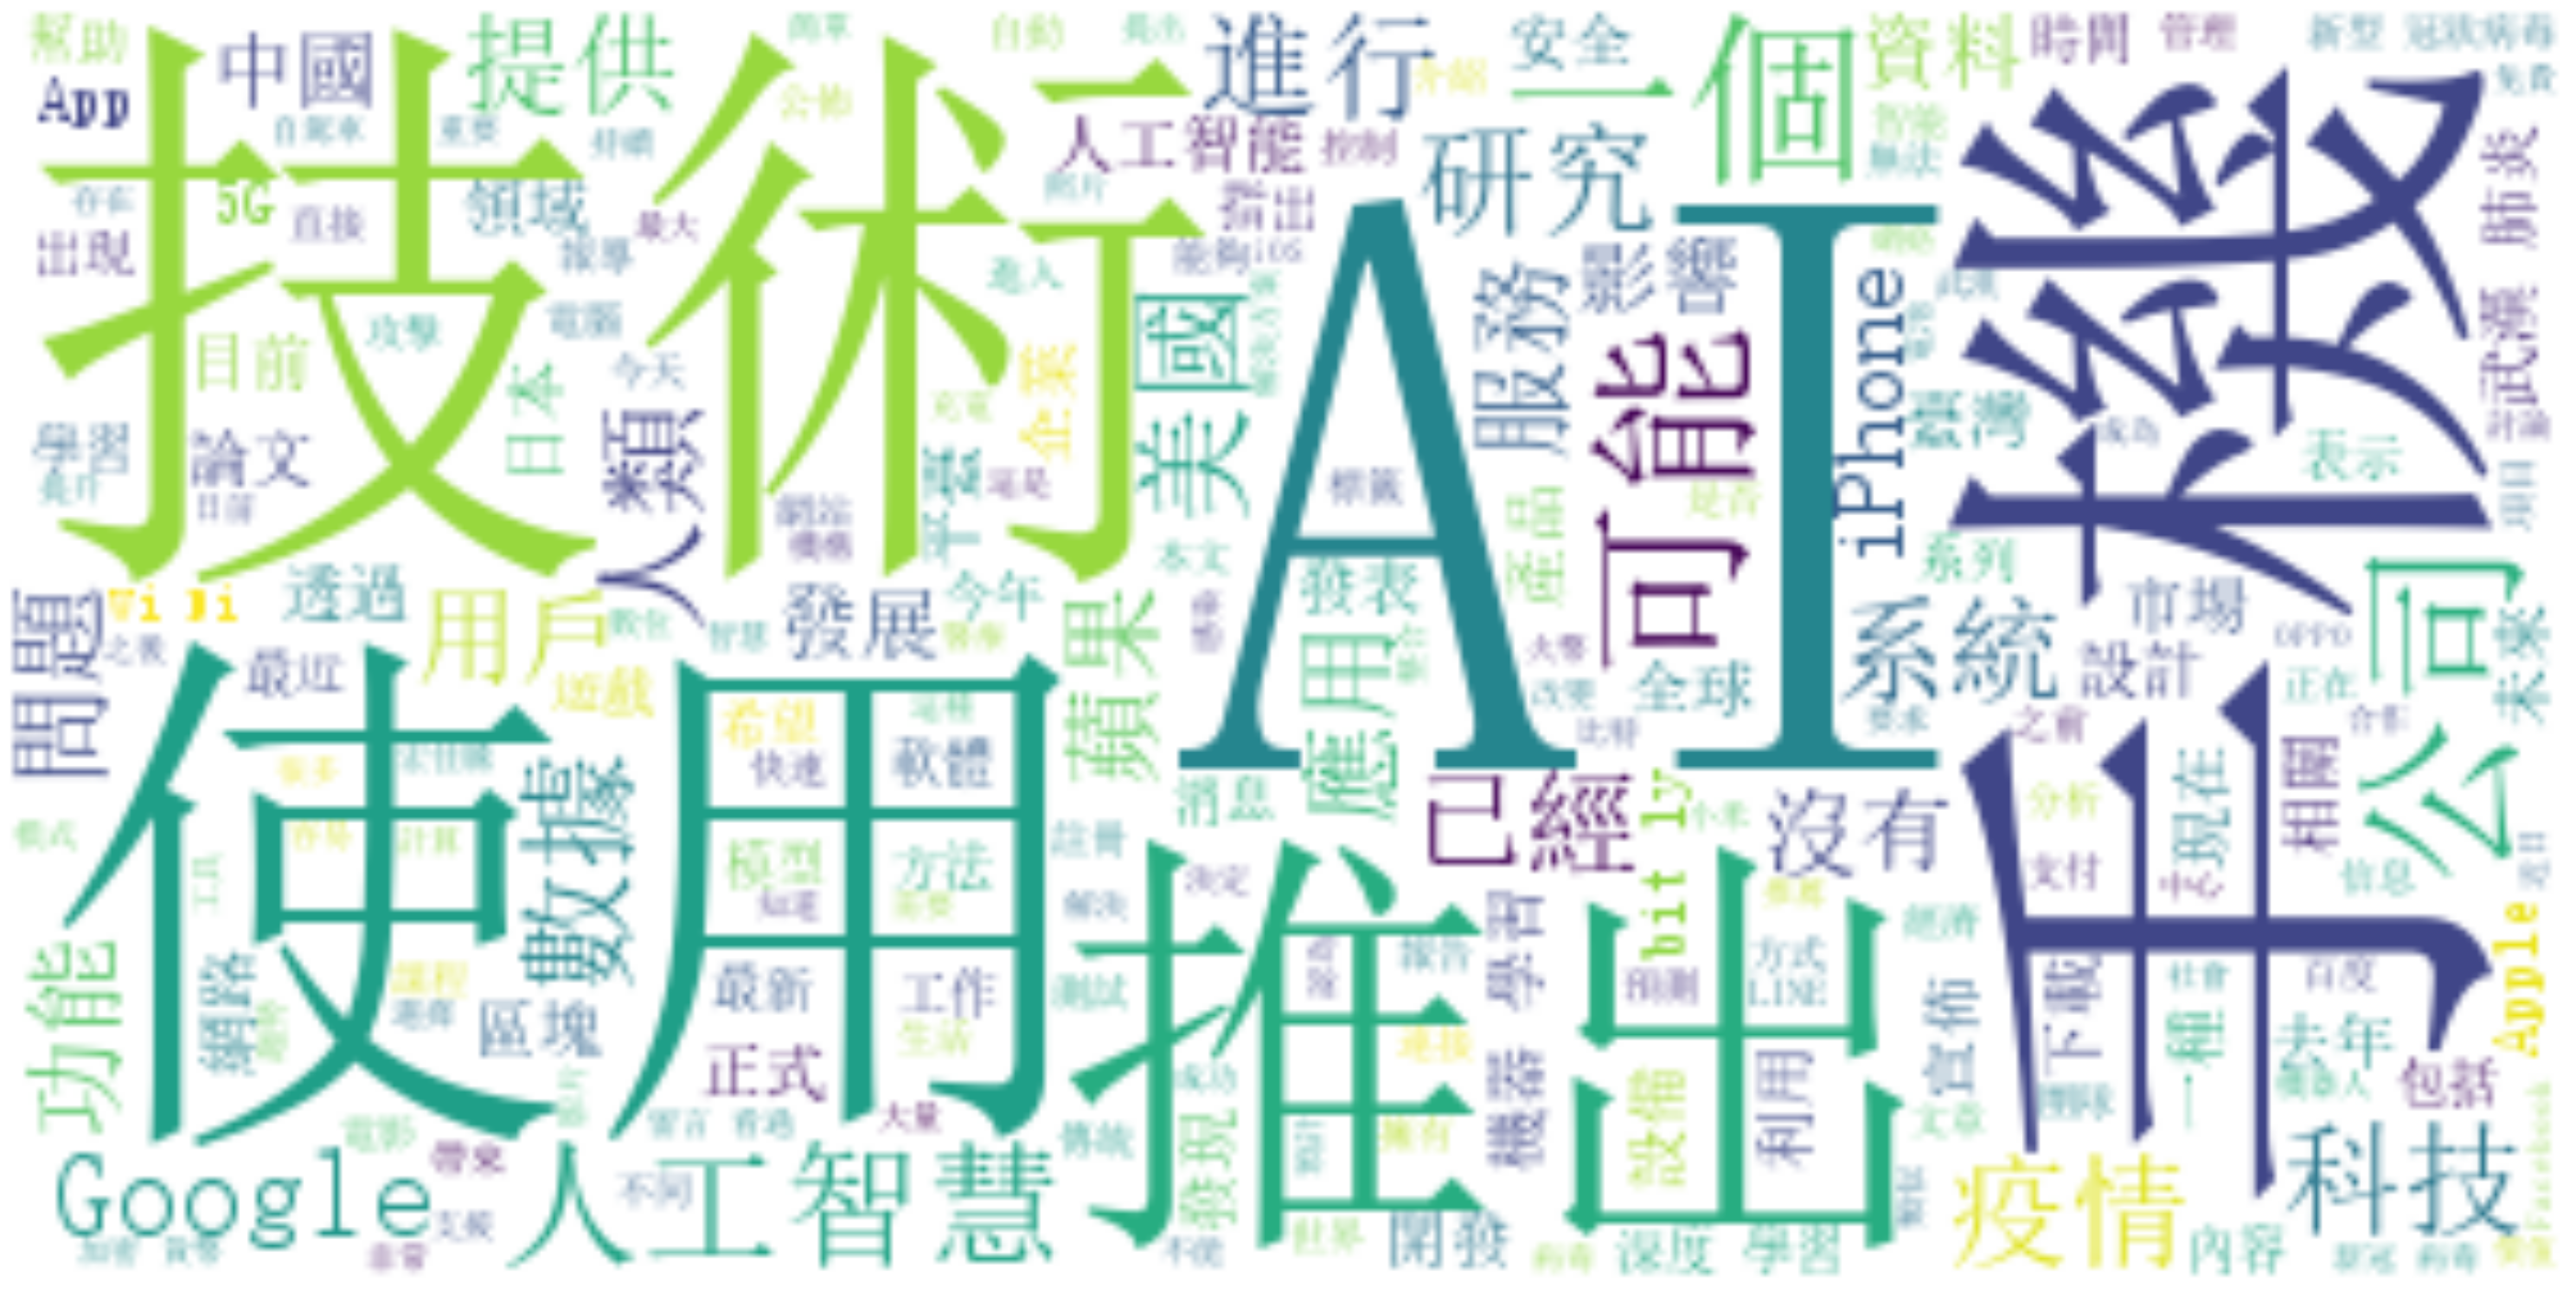

In [60]:
# 載入模組/套件
from wordcloud import WordCloud

# 建立worldcloud物件
wc = WordCloud(background_color = 'white', #設定背景顏色，預設背景顏色為黑色
               font_path = "C:\\Windows\\Fonts\\simsun.ttc", #設定文字字型
               max_words=200, # 最大分詞數量
               prefer_horizontal=0.9 #調整分詞中水平與垂直的比例
               #mask = #設定文字雲形狀，文字雲預設形狀是長方形
                     )

# 以字典資料建立文字雲
wc.generate(term_contents)
# wordcloud.generate_from_frequencies(frequencies=content_freq)
# 繪圖及存檔
plt.figure(figsize=(50,50))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# 輸出圖片
fig_path = "D:\\Jupyter\\1st-PyCrawlerMarathon\\content.png"
wc.to_file(fig_path)